In [3]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
from dataset.mnist import load_mnist
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))



train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7832333333333333, 0.7906
train acc, test acc | 0.8798666666666667, 0.8839
train acc, test acc | 0.8990833333333333, 0.9037
train acc, test acc | 0.9085333333333333, 0.9123
train acc, test acc | 0.91525, 0.919
train acc, test acc | 0.9200833333333334, 0.9224
train acc, test acc | 0.9249, 0.9269
train acc, test acc | 0.9280166666666667, 0.9308
train acc, test acc | 0.9313666666666667, 0.9323
train acc, test acc | 0.9338333333333333, 0.9353
train acc, test acc | 0.9371166666666667, 0.9377
train acc, test acc | 0.9392333333333334, 0.9402
train acc, test acc | 0.9413833333333333, 0.9407
train acc, test acc | 0.9439666666666666, 0.9437
train acc, test acc | 0.9451833333333334, 0.9445
train acc, test acc | 0.9471666666666667, 0.9467


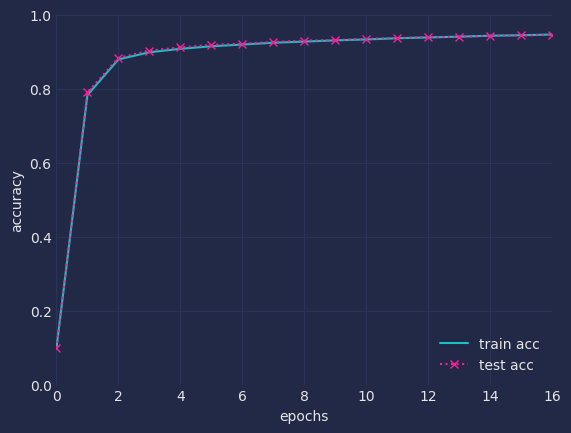

In [15]:
# 그래프 그리기
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle=':', marker='x')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.xlim(0, 16)
plt.legend(loc='lower right')
plt.show()